# import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\machine learning data sets\\Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x = df.iloc[:,[3,4]].values

# using the elbow method to find the optimal no. of clusters

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    


In [8]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562,
 19634.554629349972]

# plotting the graph of elbow method

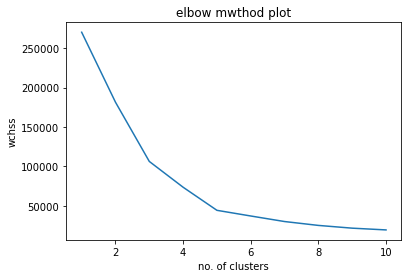

In [9]:
plt.plot(range(1,11),wcss)
plt.title('elbow mwthod plot')
plt.xlabel('no. of clusters')
plt.ylabel('wchss')
plt.show()


# training the kmeans model on dataset

In [11]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [12]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

# visualising the clusters

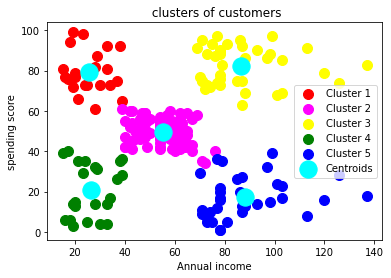

In [17]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s = 100,c='red',label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s = 100,c='magenta',label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 100,c='yellow',label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s = 100,c='green',label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],s = 100,c='blue',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s = 300,c = 'cyan',label = 'Centroids')
plt.title(' clusters of customers')
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()
